In [ ]:
!pip install huggingface_hub
!pip install transformers
!pip install datasets


In [ ]:
# datasets
import datasets
import transformers
import torch
datasets.list_datasets()

['acronym_identification',
 'ade_corpus_v2',
 'UCLNLP/adversarial_qa',
 'aeslc',
 'afrikaans_ner_corpus',
 'ag_news',
 'allenai/ai2_arc',
 'air_dialogue',
 'ajgt_twitter_ar',
 'allegro_reviews',
 'allocine',
 'alt',
 'amazon_polarity',
 'amazon_reviews_multi',
 'amazon_us_reviews',
 'ambig_qa',
 'nala-cub/americas_nli',
 'ami',
 'amttl',
 'facebook/anli',
 'app_reviews',
 'aqua_rat',
 'aquamuse',
 'bigIR/ar_cov19',
 'ar_res_reviews',
 'ar_sarcasm',
 'arabic_billion_words',
 'arabic_pos_dialect',
 'arabic_speech_corpus',
 'arcd',
 'arsentd_lev',
 'art',
 'arxiv_dataset',
 'ascent_kb',
 'aslg_pc12',
 'asnq',
 'facebook/asset',
 'assin',
 'assin2',
 'atomic',
 'autshumato',
 'facebook/babi_qa',
 'banking77',
 'bbaw_egyptian',
 'bbc_hindi_nli',
 'bc2gm_corpus',
 'AI-Lab-Makerere/beans',
 'best2009',
 'Helsinki-NLP/bianet',
 'bible_para',
 'big_patent',
 'billsum',
 'bing_coronavirus_query_set',
 'biomrc',
 'biosses',
 'TheBritishLibrary/blbooks',
 'TheBritishLibrary/blbooksgenre',
 'blende

##3)

In [ ]:
facts = datasets.load_dataset('tweet_eval', 'emoji')
facts

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 45000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 5000
    })
})

In [ ]:
print(facts['train']['text'][3])
print(facts['train']['label'][3])

️ ️ ️ ️ @ Toys"R"Us
0


In [ ]:
facts.set_format(type='pandas')
df = facts['train'][:]
df.head()

,text,label
0,Sunday afternoon walking through Venice in the...,12
1,Time for some BBQ and whiskey libations. Chomp...,19
2,Love love love all these people ️ ️ ️ #friends...,0
3,"️ ️ ️ ️ @ Toys""R""Us",0
4,Man these are the funniest kids ever!! That fa...,2


<Axes: ylabel='label'>

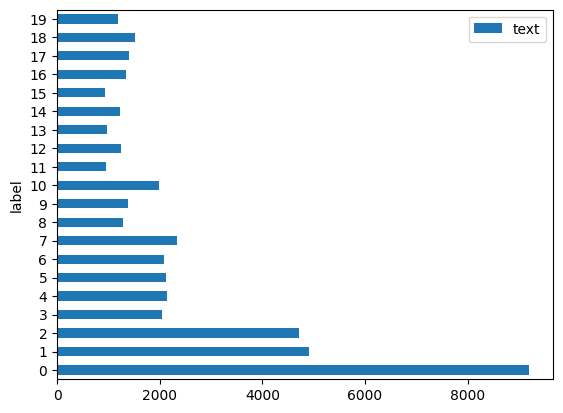

In [ ]:
df.groupby('label').count().plot.barh()

In [ ]:
# Tokenization
model_pkg = 'distilbert-base-uncased'
distilbert_tokenizer = transformers.AutoTokenizer.from_pretrained(model_pkg)

In [ ]:
def tokenize(x):
    return distilbert_tokenizer(x['text'], padding=True, truncation=True)
facts.set_format(type=None)
print(tokenize(facts['train'][:2]))
print(facts['train'][:2])

{'input_ids': [[101, 4465, 5027, 3788, 2083, 7914, 1999, 1996, 3103, 2007, 1030, 5310, 1030, 11428, 12631, 5420, 1010, 7914, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 2051, 2005, 2070, 22861, 4160, 1998, 13803, 5622, 23757, 2015, 1012, 16480, 8737, 1010, 19337, 2818, 1010, 16480, 8737, 999, 1006, 1030, 28016, 1005, 1055, 5610, 4580, 3347, 1011, 1038, 1011, 10861, 1007, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}
{'text': ['Sunday afternoon walking through Venice in the sun with @user ️ ️ ️ @ Abbot Kinney, Venice', "Time for some BBQ and whiskey libations. Chomp, belch, chomp! (@ Lucille's Smokehouse Bar-B-Que)"], 'label': [12, 19]}


In [ ]:
encoded_facts = facts.map(tokenize, batched=True)

In [ ]:
encoded_facts

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 45000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 50000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 5000
    })
})

In [ ]:
# using a pretrained model
# If you have a gpu use it!
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = transformers.AutoModel.from_pretrained(model_pkg).to(device)

In [ ]:
text = 'this is a test'
inputs = distilbert_tokenizer(text, return_tensors='pt')
inputs

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}

In [ ]:
with torch.no_grad():
    outputs = model(**inputs)
outputs

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]]), hidden_states=None, attentions=None)

In [ ]:
def hidden_states(x):
    inputs = {k:v.to(device) for k,v in x.items()
              if k in distilbert_tokenizer.model_input_names}
    with torch.no_grad():
        hidden_state = model(**inputs).last_hidden_state
    return {'hidden_state': hidden_state[:,0].cpu().numpy()}


In [ ]:
encoded_facts.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])
hidden_facts = encoded_facts.map(hidden_states, batched=True)

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [ ]:
hidden_facts['train']['hidden_state']

tensor([[-0.0169, -0.0762,  0.1127,  ..., -0.2457,  0.5017,  0.2395],
        [ 0.0682, -0.1468, -0.0233,  ..., -0.1035,  0.3252,  0.2069],
        [ 0.1363,  0.0187,  0.2450,  ..., -0.0418,  0.0613,  0.3250],
        ...,
        [ 0.1083, -0.0506,  0.2648,  ..., -0.1966,  0.1580,  0.3916],
        [-0.0645, -0.2847, -0.0123,  ..., -0.1048,  0.2155,  0.3420],
        [ 0.0793, -0.1707,  0.1486,  ..., -0.2652,  0.2375,  0.2198]])

In [ ]:
X_train = hidden_facts['train']['hidden_state'].numpy()
y_train = hidden_facts['train']['label'].numpy()
X_validation = hidden_facts['validation']['hidden_state'].numpy()
y_validation = hidden_facts['validation']['label'].numpy()

In [38]:
!pip install umap
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from umap import UMAP
import pandas as pd
umapper = umap.UMAP(n_components=2)
tsne = TSNE(n_components=2)
X_scaled = MinMaxScaler().fit_transform(X_train)
X_tsne = tsne.fit_transform(X_scaled)
X_umap = umapper.fit_transform(X_scaled)
df = pd.DataFrame()
df['x']=X_tsne[:,0]
df['y']=X_tsne[:,1]
df['label']=y_train

ImportError: cannot import name 'UMAP' from 'umap' (/usr/local/lib/python3.10/dist-packages/umap/__init__.py)

AttributeError: 'DataFrame' object has no attribute 'x'

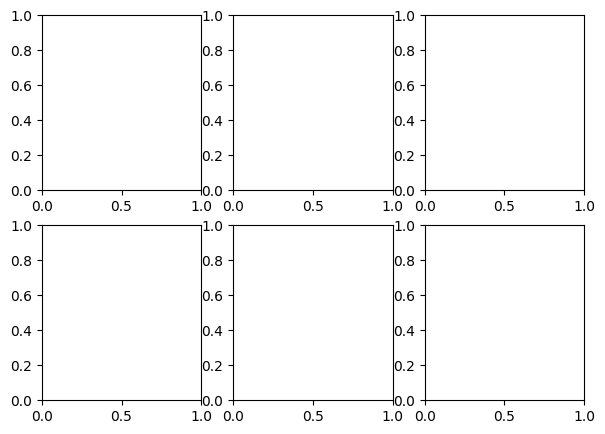

In [40]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(2, 3 , figsize=(7,5))
axes = axes.flatten()
cmaps = ['Greys', 'Blues', 'Oranges', 'Reds', 'Greens']
labels = facts['train'].features['label'].names
for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_sub = df[df['label']==labels.index(label)]
    axes[i].set_xlim((df.x.min(), df.x.max()))
    axes[i].set_ylim((df.y.min(), df.y.max()))
    axes[i].hexbin(df_sub['x'], df_sub['y'], cmap=cmap)
    axes[i].set_title(label)
plt.show()

In [ ]:
df = pd.DataFrame()
df['x']=X_umap[:,0]
df['y']=X_umap[:,1]
df['label']=y_train

In [ ]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(2, 3 , figsize=(7,5))
axes = axes.flatten()
cmaps = ['Greys', 'Blues', 'Oranges', 'Reds', 'Greens']
labels = facts['train'].features['label'].names
for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_sub = df[df['label']==labels.index(label)]
    axes[i].set_xlim((df.x.min(), df.x.max()))
    axes[i].set_ylim((df.y.min(), df.y.max()))
    axes[i].hexbin(df_sub['x'], df_sub['y'], cmap=cmap)
    axes[i].set_title(label)
plt.show()